<a href="https://colab.research.google.com/github/ybaris/DATA-690-WANG/blob/master/Project_Deliverable_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2 Deliverable: 
On this project I analyzed if winning the first set has a significant effect on winning the match in tennis. I anaylized men's tennis 2017 ATP data. I would like to see which players have the best rates on this and if there are major differences between different surfaces. 

License
Creative Commons License
Tennis databases, files, and algorithms by Jeff Sackmann / Tennis Abstract is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
Based on a work at https://github.com/JeffSackmann.

In other words: Attribution is required. Non-commercial use only.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
df = pd.read_csv("/content/atp_matches_2017.csv")
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2017-M020,Brisbane,Hard,32,A,20170102,271,104678,NaN,NaN,Viktor Troicki,R,193.0,SRB,30.893908,106415,NaN,Q,Yoshihito Nishioka,L,NaN,JPN,21.267625,6-4 7-5,3,R32,91.0,11.0,5.0,64.0,45.0,35.0,6.0,11.0,1.0,3.0,0.0,1.0,82.0,53.0,33.0,13.0,11.0,6.0,10.0,29.0,1385.0,100.0,604.0
1,2017-M020,Brisbane,Hard,32,A,20170102,272,106378,NaN,NaN,Kyle Edmund,R,NaN,GBR,21.984942,124014,NaN,Q,Ernesto Escobedo,R,NaN,USA,20.498289,7-6(4) 7-6(6),3,R32,130.0,11.0,2.0,83.0,48.0,37.0,19.0,12.0,2.0,3.0,11.0,3.0,113.0,67.0,39.0,27.0,12.0,9.0,10.0,45.0,1001.0,141.0,443.0
2,2017-M020,Brisbane,Hard,32,A,20170102,273,106298,6.0,NaN,Lucas Pouille,R,185.0,FRA,22.858316,104468,NaN,NaN,Gilles Simon,R,183.0,FRA,32.016427,7-6(6) 7-6(4),3,R32,125.0,7.0,2.0,102.0,52.0,37.0,24.0,12.0,8.0,12.0,1.0,4.0,76.0,42.0,29.0,16.0,12.0,0.0,4.0,15.0,2156.0,25.0,1585.0
3,2017-M020,Brisbane,Hard,32,A,20170102,275,111577,NaN,Q,Jared Donaldson,R,NaN,USA,20.232717,104180,NaN,NaN,Gilles Muller,L,193.0,LUX,33.653662,6-4 6-4,3,R32,75.0,12.0,2.0,55.0,33.0,27.0,13.0,10.0,0.0,1.0,10.0,2.0,58.0,37.0,27.0,7.0,10.0,2.0,5.0,105.0,570.0,34.0,1255.0
4,2017-M020,Brisbane,Hard,32,A,20170102,276,111442,NaN,WC,Jordan Thompson,R,NaN,AUS,22.704997,111200,NaN,WC,Elias Ymer,R,NaN,SWE,20.731006,6-3 6-2,3,R32,90.0,1.0,0.0,46.0,28.0,26.0,6.0,8.0,1.0,2.0,1.0,6.0,74.0,43.0,23.0,13.0,9.0,10.0,15.0,79.0,689.0,160.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,NaN,Grigor Dimitrov,R,188.0,BUL,26.496920,105676,7.0,NaN,David Goffin,R,163.0,BEL,26.934976,7-5 4-6 6-3,3,F,150.0,5.0,6.0,103.0,67.0,47.0,18.0,16.0,7.0,10.0,10.0,5.0,107.0,54.0,42.0,22.0,15.0,11.0,15.0,6.0,3650.0,8.0,2975.0
2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NaN,NaN,David Goffin,R,163.0,BEL,26.954141,106298,NaN,NaN,Lucas Pouille,R,185.0,FRA,23.739904,7-5 6-3 6-1,3,RR,119.0,12.0,0.0,74.0,48.0,40.0,17.0,14.0,0.0,0.0,6.0,2.0,95.0,53.0,33.0,21.0,14.0,6.0,11.0,7.0,3775.0,18.0,2235.0
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,32.594114,104327,NaN,NaN,Steve Darcis,R,178.0,BEL,33.689254,6-3 6-2 6-1,5,RR,106.0,12.0,2.0,64.0,33.0,31.0,19.0,12.0,0.0,0.0,1.0,2.0,81.0,54.0,30.0,12.0,12.0,5.0,11.0,15.0,2320.0,76.0,667.0
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NaN,NaN,David Goffin,R,163.0,BEL,26.954141,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,32.594114,7-6(5) 6-3 6-2,3,RR,164.0,1.0,0.0,122.0,71.0,47.0,33.0,15.0,10.0,10.0,10.0,3.0,88.0,54.0,44.0,13.0,14.0,7.0,10.0,7.0,3775.0,15.0,2320.0


In [3]:
df.shape

(2886, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2886 non-null   object 
 1   tourney_name        2886 non-null   object 
 2   surface             2806 non-null   object 
 3   draw_size           2886 non-null   int64  
 4   tourney_level       2886 non-null   object 
 5   tourney_date        2886 non-null   int64  
 6   match_num           2886 non-null   int64  
 7   winner_id           2886 non-null   int64  
 8   winner_seed         1222 non-null   float64
 9   winner_entry        366 non-null    object 
 10  winner_name         2886 non-null   object 
 11  winner_hand         2884 non-null   object 
 12  winner_ht           2289 non-null   float64
 13  winner_ioc          2886 non-null   object 
 14  winner_age          2886 non-null   float64
 15  loser_id            2886 non-null   int64  
 16  loser_

### Column Name Explanation

* Many of the columns in the 'matches' files are self-explanatory, or are very similar to previous columns.

tourney_id
- a unique identifier for each tournament, such as 2020-888. The exact formats are borrowed from several different sources, so while the first four characters are always the year, the rest of the ID doesn't follow a predictable structure.

tourney_name
surface
draw_size
- number of players in the draw, often rounded up to the nearest power of 2. (For instance, a tournament with 28 players may be shown as 32.)

tourney_level
- For men: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other season-ending events, and 'D' = Davis Cup

tourney_date
- eight digits, YYYYMMDD, usually the Monday of the tournament week.

match_num
- a match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary. 

winner_id
- the player_id used in this repo for the winner of the match

winner_seed
winner_entry
- 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected ranking, 'ITF' = ITF entry, and there are a few others that are occasionally used.

winner_name
winner_hand
winner_ht
- height in centimeters, where available

winner_ioc
- three-character country code

winner_age
- age, in years, as of the tourney_date

loser_id
loser_seed
loser_entry
loser_name
loser_hand
loser_ht
loser_ioc
loser_age
score
best_of
- '3' or '5', indicating the the number of sets for this match

round
minutes
- match length, where available

- w_ace: winner's number of aces
- w_df: winner's number of doubles faults
- w_svpt: winner's number of serve points
- w_1stIn: winner's number of first serves made
- w_1stWon: winner's number of first-serve points won
- w_2ndWon: winner's number of second-serve points won
- w_SvGms: winner's number of serve games
- w_bpSaved: winner's number of break points saved
- w_bpFaced: winner's number of break points faced

l_ace
l_df
l_svpt
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_bpSaved
l_bpFaced

winner_rank
- winner's ATP or WTA rank, as of the tourney_date, or the most recent ranking date before the tourney_date
winner_rank_points
- number of ranking points, where available
loser_rank
loser_rank_points

Resource: https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt

### Cleansing the data

In [5]:
# getting desired columns from the big data frame
data = pd.DataFrame()
data = df[['tourney_name', 'tourney_level', 'surface', 'draw_size', 'winner_id', 'winner_name', 'winner_hand', 'score', 'best_of', 'round', 'loser_name', 'loser_id']]
data

,tourney_name,tourney_level,surface,draw_size,winner_id,winner_name,winner_hand,score,best_of,round,loser_name,loser_id
0,Brisbane,A,Hard,32,104678,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka,106415
1,Brisbane,A,Hard,32,106378,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo,124014
2,Brisbane,A,Hard,32,106298,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon,104468
3,Brisbane,A,Hard,32,111577,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller,104180
4,Brisbane,A,Hard,32,111442,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer,111200
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Tour Finals,F,Hard,8,105777,Grigor Dimitrov,R,7-5 4-6 6-3,3,F,David Goffin,105676
2882,Davis Cup WG F: BEL vs FRA,D,Hard,4,105676,David Goffin,R,7-5 6-3 6-1,3,RR,Lucas Pouille,106298
2883,Davis Cup WG F: BEL vs FRA,D,Hard,4,104542,Jo-Wilfried Tsonga,R,6-3 6-2 6-1,5,RR,Steve Darcis,104327
2884,Davis Cup WG F: BEL vs FRA,D,Hard,4,105676,David Goffin,R,7-6(5) 6-3 6-2,3,RR,Jo-Wilfried Tsonga,104542


In [6]:
data['tourney_name'].nunique()

133

In [7]:
# I would like to analyze the tournaments which has at least 32 players in their draw
data32 = data[data['draw_size'] >= 32]
data32

,tourney_name,tourney_level,surface,draw_size,winner_id,winner_name,winner_hand,score,best_of,round,loser_name,loser_id
0,Brisbane,A,Hard,32,104678,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka,106415
1,Brisbane,A,Hard,32,106378,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo,124014
2,Brisbane,A,Hard,32,106298,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon,104468
3,Brisbane,A,Hard,32,111577,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller,104180
4,Brisbane,A,Hard,32,111442,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer,111200
...,...,...,...,...,...,...,...,...,...,...,...,...
2862,Paris Masters,M,Hard,64,104545,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro,105223
2863,Paris Masters,M,Hard,64,105936,Filip Krajinovic,R,W/O,3,QF,Rafael Nadal,104745
2864,Paris Masters,M,Hard,64,106058,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau,103898
2865,Paris Masters,M,Hard,64,105936,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner,104545


In [8]:
# list all the tournaments in ATP which has a draw size equal or more than 32 players
print(data32["tourney_name"].nunique())
data32["tourney_name"].unique()

66


array(['Brisbane', 'Chennai', 'Doha', 'Auckland', 'Sydney',
       'Australian Open', 'Montpellier', 'Quito', 'Sofia', 'Buenos Aires',
       'Memphis', 'Rotterdam', 'Delray Beach', 'Marseille',
       'Rio de Janeiro', 'Acapulco', 'Dubai', 'Sao Paulo',
       'Indian Wells Masters', 'Miami Masters', 'Houston', 'Marrakech',
       'Monte Carlo Masters', 'Barcelona', 'Budapest', 'Estoril',
       'Istanbul', 'Munich', 'Madrid Masters', 'Rome Masters', 'Geneva',
       'Lyon', 'Roland Garros', 's Hertogenbosch', 'Stuttgart', 'Halle',
       "Queen's Club", 'Antalya', 'Eastbourne', 'Wimbledon', 'Bastad',
       'Newport', 'Umag', 'Atlanta', 'Gstaad', 'Hamburg', 'Kitzbuhel',
       'Los Cabos', 'Washington', 'Canada Masters', 'Cincinnati Masters',
       'Winston-Salem', 'US Open', 'Metz', 'St. Petersburg', 'Chengdu',
       'Shenzhen', 'Beijing', 'Tokyo', 'Shanghai Masters', 'Antwerp',
       'Moscow', 'Stockholm', 'Basel', 'Vienna', 'Paris Masters'],
      dtype=object)

In [9]:
# removing the matches which ended with a withdraw from our data frame. They do not have a valid score for sets. 
data32 = data32[data32['score'] != "W/O"]
data32

,tourney_name,tourney_level,surface,draw_size,winner_id,winner_name,winner_hand,score,best_of,round,loser_name,loser_id
0,Brisbane,A,Hard,32,104678,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka,106415
1,Brisbane,A,Hard,32,106378,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo,124014
2,Brisbane,A,Hard,32,106298,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon,104468
3,Brisbane,A,Hard,32,111577,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller,104180
4,Brisbane,A,Hard,32,111442,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer,111200
...,...,...,...,...,...,...,...,...,...,...,...,...
2861,Paris Masters,M,Hard,64,103898,Julien Benneteau,R,7-6(5) 7-5,3,QF,Marin Cilic,105227
2862,Paris Masters,M,Hard,64,104545,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro,105223
2864,Paris Masters,M,Hard,64,106058,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau,103898
2865,Paris Masters,M,Hard,64,105936,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner,104545


### Surface Analysis

In [10]:
print(data32['surface'].nunique())
print(data32['surface'].unique())
print("Number of games on 'Hard' surface is:" , data32[data32.surface == 'Hard'].shape[0])
print("Number of games on 'Clay' surface is:" , data32[data32.surface == 'Clay'].shape[0])
print("Number of games on 'Grass' surface is:" , data32[data32.surface == 'Grass'].shape[0])

3
['Hard' 'Clay' 'Grass']
Number of games on 'Hard' surface is: 1478
Number of games on 'Clay' surface is: 802
Number of games on 'Grass' surface is: 324


In [11]:
hard = data32[data32.surface == 'Hard'].shape[0]
clay =data32[data32.surface == 'Clay'].shape[0]
grass = data32[data32.surface == 'Grass'].shape[0]


<BarContainer object of 3 artists>

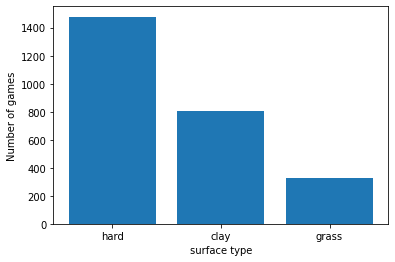

In [12]:
surfaces = ['hard', 'clay', 'grass']
games = [hard, clay, grass]

plt.xlabel('surface type')
plt.ylabel('Number of games')
plt.bar(surfaces, games)

### Player Analysis

In [13]:
print("There are", data32['winner_id'].nunique(), "different winners.")
winners = data32['winner_name'].value_counts() # displaying the number of matches each player won
winners.head(10) # top 10 players per number of winning a match in 2017

There are 214 different winners.


Rafael Nadal             67
Alexander Zverev         53
David Goffin             50
Roger Federer            49
Roberto Bautista Agut    46
Dominic Thiem            46
Grigor Dimitrov          44
Marin Cilic              42
Juan Martin del Potro    38
Diego Schwartzman        38
Name: winner_name, dtype: int64

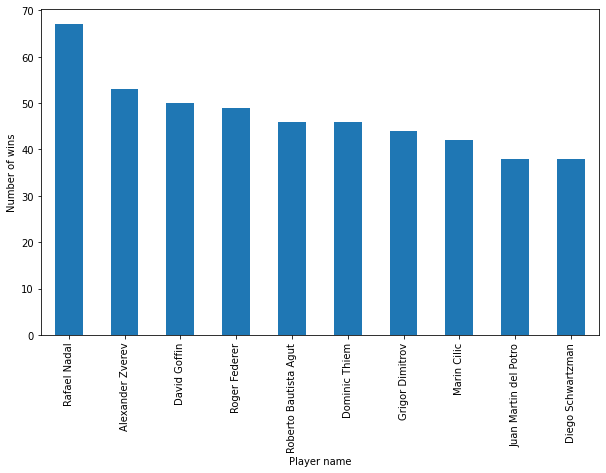

In [14]:
plt.ylabel('Number of wins')
plt.xlabel('Player name')
winners.head(10).plot.bar(figsize=(10,6)) 


#### Player Analysis for Grand Slam Tournaments

In [15]:
data_grandslam = data[data['tourney_level'] == "G"] # creating new data frame only for grandslam tournaments
data_grandslam

,tourney_name,tourney_level,surface,draw_size,winner_id,winner_name,winner_hand,score,best_of,round,loser_name,loser_id
139,Australian Open,G,Hard,128,104918,Andy Murray,R,7-5 7-6(5) 6-2,5,R128,Illya Marchenko,105011
140,Australian Open,G,Hard,128,126094,Andrey Rublev,R,4-6 6-3 7-6(0) 6-3,5,R128,Yen Hsun Lu,104229
141,Australian Open,G,Hard,128,200282,Alex De Minaur,R,5-7 6-3 2-6 7-6(2) 6-1,5,R128,Gerald Melzer,105589
142,Australian Open,G,Hard,128,105023,Sam Querrey,R,6-7(10) 7-6(4) 6-3 6-4,5,R128,Quentin Halys,111460
143,Australian Open,G,Hard,128,104545,John Isner,R,6-3 6-4 6-7(5) 6-1,5,R128,Konstantin Kravchuk,104505
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,US Open,G,Hard,128,104731,Kevin Anderson,R,7-6(5) 6-7(9) 6-3 7-6(7),5,QF,Sam Querrey,105023
2396,US Open,G,Hard,128,105807,Pablo Carreno Busta,R,6-4 6-4 6-2,5,QF,Diego Schwartzman,106043
2397,US Open,G,Hard,128,104745,Rafael Nadal,L,4-6 6-0 6-3 6-2,5,SF,Juan Martin del Potro,105223
2398,US Open,G,Hard,128,104731,Kevin Anderson,R,4-6 7-5 6-3 6-4,5,SF,Pablo Carreno Busta,105807


In [16]:
gs_winners = data_grandslam['winner_name'].value_counts()
gs_winners

Rafael Nadal                23
Roger Federer               18
Dominic Thiem               14
Marin Cilic                 13
Kevin Anderson              12
                            ..
Alex De Minaur               1
Thomaz Bellucci              1
Adam Pavlasek                1
Adrian Menendez Maceiras     1
Noah Rubin                   1
Name: winner_name, Length: 127, dtype: int64

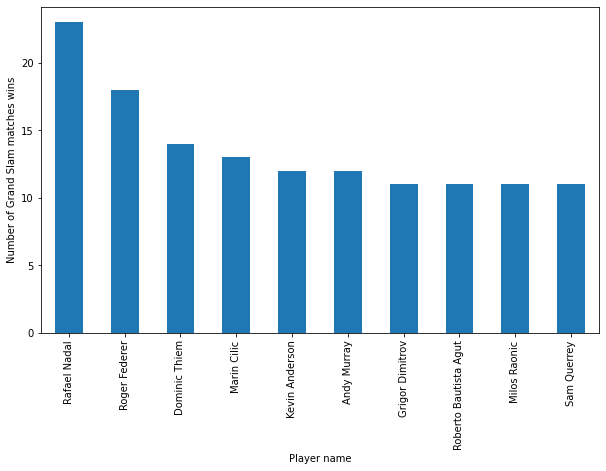

In [17]:
plt.ylabel('Number of Grand Slam matches wins')
plt.xlabel('Player name')
gs_winners.head(10).plot.bar(figsize=(10,6)) 

### First Set Winner and Match Winner

In [18]:
# displaying only score column
print(data32['score'])


0                 6-4 7-5
1           7-6(4) 7-6(6)
2           7-6(6) 7-6(4)
3                 6-4 6-4
4                 6-3 6-2
              ...        
2861           7-6(5) 7-5
2862       6-4 6-7(5) 6-4
2864              7-5 6-2
2865    6-4 6-7(2) 7-6(5)
2866          5-7 6-4 6-1
Name: score, Length: 2604, dtype: object


In [19]:
# displaying the first element of the pandas series in data32['score']
data32['score'][0]

'6-4 7-5'

In [20]:
# trying the evaluation for first set winner and match winner
for fset in data32['score'].head(10):
    print(fset)
    print(int(fset[0]) > int(fset[2]))

6-4 7-5
True
7-6(4) 7-6(6)
True
7-6(6) 7-6(4)
True
6-4 6-4
True
6-3 6-2
True
6-3 7-5
True
6-2 6-3
True
4-6 6-3 6-4
False
6-3 5-7 7-5
True
6-3 6-3
True


In [21]:
# I marked the matches won by first set winner as '1' and other matches as '0'
# And I added those values into a new list
set_and_match_winner = []
for fset in data32['score']:
    if int(fset[0]) > int(fset[2]):
        set_and_match_winner.append(1)
    else:
        set_and_match_winner.append(0)

len(set_and_match_winner)

2604

In [22]:
# since both winner_ids and winner_names are unique we can remove ids from our dataframe
data32 = data32[['tourney_name', 'tourney_level', 'surface', 'draw_size', 'winner_name', 'winner_hand', 'score', 'best_of', 'round', 'loser_name']]
data32

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer
...,...,...,...,...,...,...,...,...,...,...
2861,Paris Masters,M,Hard,64,Julien Benneteau,R,7-6(5) 7-5,3,QF,Marin Cilic
2862,Paris Masters,M,Hard,64,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro
2864,Paris Masters,M,Hard,64,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau
2865,Paris Masters,M,Hard,64,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner


In [23]:
# adding the new list into our dataframe as a new column
data32['set_and_match_winner'] = set_and_match_winner
data32

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name,set_and_match_winner
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka,1
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo,1
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon,1
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller,1
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer,1
...,...,...,...,...,...,...,...,...,...,...,...
2861,Paris Masters,M,Hard,64,Julien Benneteau,R,7-6(5) 7-5,3,QF,Marin Cilic,1
2862,Paris Masters,M,Hard,64,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro,1
2864,Paris Masters,M,Hard,64,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau,1
2865,Paris Masters,M,Hard,64,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner,1


In [24]:
data32['score'][0].split()[0] # just a display for myself

'6-4'

In [25]:
print(data32['score'].nunique())
data32['score'].unique()

1136


array(['6-4 7-5', '7-6(4) 7-6(6)', '7-6(6) 7-6(4)', ..., '6-3 6-7(5) 6-3',
       '6-4 6-7(2) 7-6(5)', '5-7 6-4 6-1'], dtype=object)

- So far I cleansed my data set and used the columns we wanted. After that with for loop and if statements in the above cells, I was able to create another column which shows if the first set winner won the match or not. Below I counted the number of 1's and 0's, so I can calculate the percentage of winning a game after winning the first set. 

- PS: Please keep in mind that this data set is only for ATP Single's and tournaments with draw size 32 player or more are taken into consideration.

In [26]:
# number of 1's is the number of matches won by the first set winner
# number of 0's is the number of matches won by the first set winner

data32['set_and_match_winner'].value_counts()

1    2082
0     522
Name: set_and_match_winner, dtype: int64

In [27]:
print("The percentage of winning the match after winning the first set is:\n", data32['set_and_match_winner'].value_counts(1)[1])

The percentage of winning the match after winning the first set is:
 0.7995391705069125


- Now let's check this percentage for **Grand Slam** tournaments in 2017

In [28]:
gs_data = data32[data32['tourney_level'] == "G"]
gs_data

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name,set_and_match_winner
139,Australian Open,G,Hard,128,Andy Murray,R,7-5 7-6(5) 6-2,5,R128,Illya Marchenko,1
140,Australian Open,G,Hard,128,Andrey Rublev,R,4-6 6-3 7-6(0) 6-3,5,R128,Yen Hsun Lu,0
141,Australian Open,G,Hard,128,Alex De Minaur,R,5-7 6-3 2-6 7-6(2) 6-1,5,R128,Gerald Melzer,0
142,Australian Open,G,Hard,128,Sam Querrey,R,6-7(10) 7-6(4) 6-3 6-4,5,R128,Quentin Halys,0
143,Australian Open,G,Hard,128,John Isner,R,6-3 6-4 6-7(5) 6-1,5,R128,Konstantin Kravchuk,1
...,...,...,...,...,...,...,...,...,...,...,...
2395,US Open,G,Hard,128,Kevin Anderson,R,7-6(5) 6-7(9) 6-3 7-6(7),5,QF,Sam Querrey,1
2396,US Open,G,Hard,128,Pablo Carreno Busta,R,6-4 6-4 6-2,5,QF,Diego Schwartzman,1
2397,US Open,G,Hard,128,Rafael Nadal,L,4-6 6-0 6-3 6-2,5,SF,Juan Martin del Potro,0
2398,US Open,G,Hard,128,Kevin Anderson,R,4-6 7-5 6-3 6-4,5,SF,Pablo Carreno Busta,0


In [29]:
gs_data['set_and_match_winner'].value_counts()

1    403
0    105
Name: set_and_match_winner, dtype: int64

In [30]:
print("The percentage of winning the match after winning the first set in Grand Slam tournaments is:\n",gs_data['set_and_match_winner'].value_counts(1)[1])

The percentage of winning the match after winning the first set in Grand Slam tournaments is:
 0.7933070866141733


# So far I was able to cleanse the data and get the first results that I wanted. For the next deliverable:
- I am planning to analyze the players with highest first set and match winning ratio. 
- I will analyze if there are significant differences between different surfaces. 
- I am planning to cleanse the things I did above and put them in a function, so I can analyze more years of ATP Singles data. I would like to analyze last 10 years data if the csv format is eligible.  